In [406]:
# Title Of Project :Customer Segmentation Using RFM Analysis and Clustering
# URL for Dataset : https://archive.ics.uci.edu/dataset/352/online+retail

# Problem Statement:
Developed and implemented an RFM (Recency, Frequency, Monetary) model to segment customers for a UK-based online retail company, leading to more targeted marketing strategies. This approach identified key customer segments, boosting sales and enhancing client satisfaction.


In [407]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Basic Data Understanding

In [409]:
data = pd.read_excel(r"/content/drive/MyDrive/csv_files/Online Retail.xlsx")

In [410]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [411]:
# shape of data
data.shape

(541909, 8)

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [413]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Handling Missing Value

In [414]:
# Data Cleaning

In [415]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [416]:
data[data["CustomerID"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [417]:
misisng_percentage = data["Description"].isnull().mean()*100
print(f"Missing Description Percentage :{misisng_percentage:.2f}%")

Missing Description Percentage :0.27%


In [418]:
# There are 0.27 missing value in "Description" column it's ok to drop the missing column
data.dropna(subset=["Description"], inplace=True)

In [419]:
# column "CustomerID"

In [420]:
missing_percentage = data['CustomerID'].isnull().mean() * 100
print(f"Missing CustomerID Percentage: {missing_percentage:.2f}%")

Missing CustomerID Percentage: 24.72%


In [421]:
# Deleting rows with missing CustomerID values is often necessary to maintain data quality and integrity.
# Since CustomerID is a critical identifier for customers, missing values in this column can lead to inaccurate analysis and modeling.
# Removing these rows helps ensure that our results are based on complete and reliable data, reducing potential biases and improving the robustness of our insights.

data = data.dropna(subset=['CustomerID'])

In [422]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [423]:
data.shape

(406829, 8)

data cleaning done !

In [424]:
data[data.duplicated()] # data is not duplicated()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [425]:
# there are 5225 duplicate values and aslo confirm .

In [426]:
data[(data["InvoiceNo"]==536409)&(data["StockCode"]==21866)&(data["Description"]=="UNION JACK FLAG LUGGAGE TAG")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom


In [427]:
data.drop_duplicates(keep='first',inplace=True)

In [428]:
# chech again
data.duplicated().sum()

0

# Basic EDA

In [429]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [430]:
# Top 10 Best-Selling Products by Description
data["Description"].value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1894
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1409
ASSORTED COLOUR BIRD ORNAMENT,1405
LUNCH BAG RED RETROSPOT,1345
SET OF 3 CAKE TINS PANTRY DESIGN,1224
POSTAGE,1196
LUNCH BAG BLACK SKULL.,1099


<ipython-input-431-cc09d597e461>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Top 10 Product')

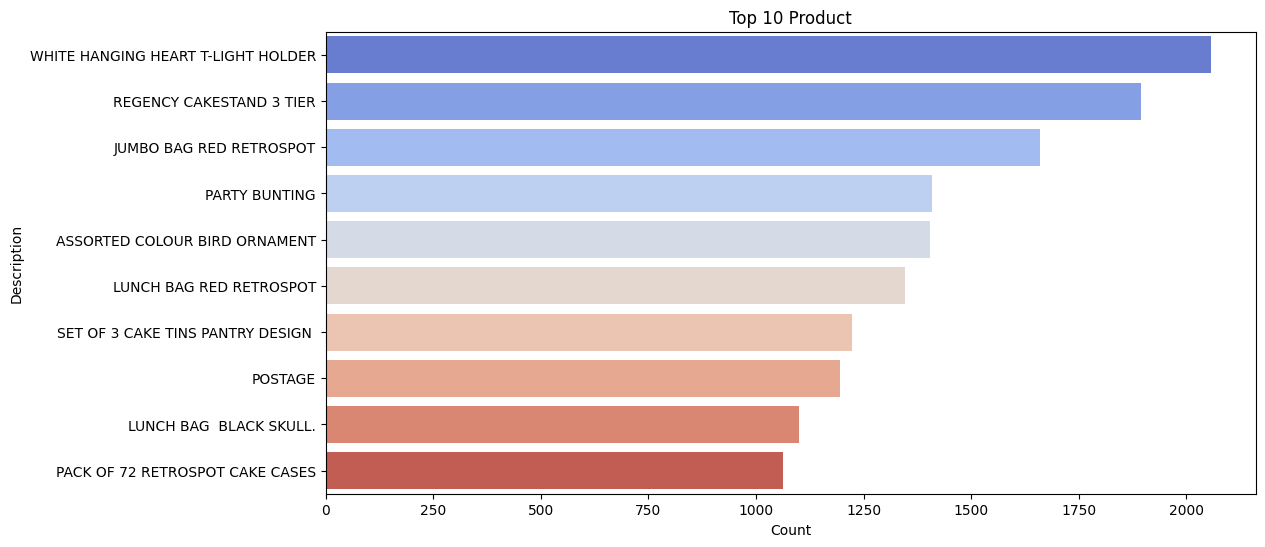

In [431]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=data["Description"].value_counts().head(10).values,
    y=data["Description"].value_counts().head(10).index,
    palette="coolwarm"
)
plt.xlabel("Count")
plt.title("Top 10 Product")

Observation:
The most popular product is the "WHITE HANGING HEART T-LIGHT HOLDER" with 2,058 sales, followed closely by the "REGENCY CAKESTAND 3 TIER" with 1,894 sales. This suggests that home decor items are highly sought after by customers.

In [432]:
# Top 10 Best-Selling Products by Stock Code

In [433]:
data["StockCode"].value_counts().head(10)

,count
StockCode,
85123A,2065
22423,1894
85099B,1659
47566,1409
84879,1405
20725,1346
22720,1224
POST,1196
22197,1110


<ipython-input-434-88560f22d09b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Top 10 Best-Selling Products by Stock Code')

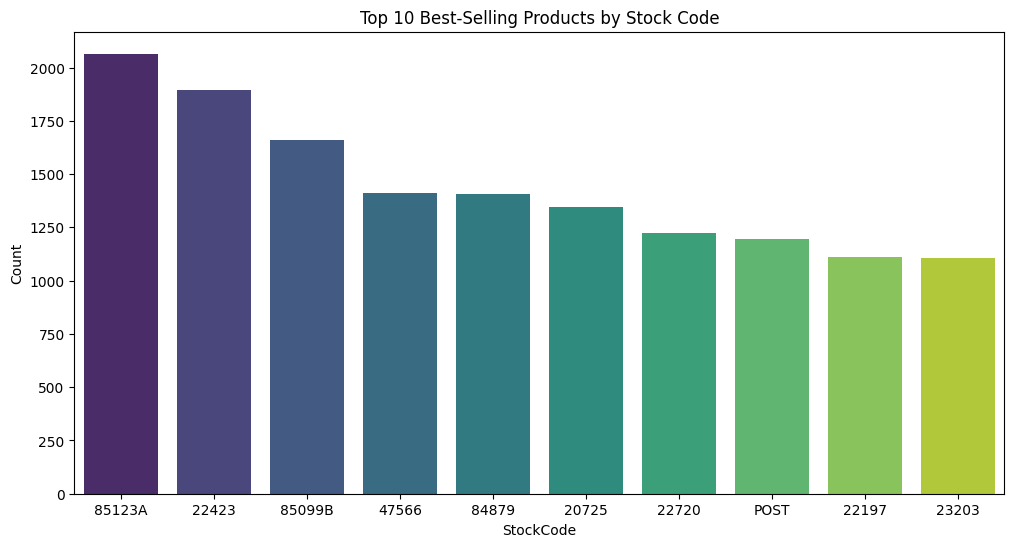

In [434]:
plt.figure(figsize=(12,6))
sns.barplot(
    x = data["StockCode"].value_counts().head(10).index,
    y = data["StockCode"].value_counts().head(10).values,
    palette = "viridis"
)
plt.ylabel("Count")
plt.title("Top 10 Best-Selling Products by Stock Code")

Observation:

The stock code 85123A is the best-selling item, with 2,065 sales. There is a close correlation between the top-selling descriptions and their stock codes.

In [435]:
# Count of Unique Countries with Sales
data["Country"].nunique()

37

In [436]:
 # Top 10 Countries by Number of Sales
data["Country"].value_counts().head(10)

,count
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


<ipython-input-437-1041066b22be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Text(0.5, 1.0, 'Top 10 Countries by Number of Sales')

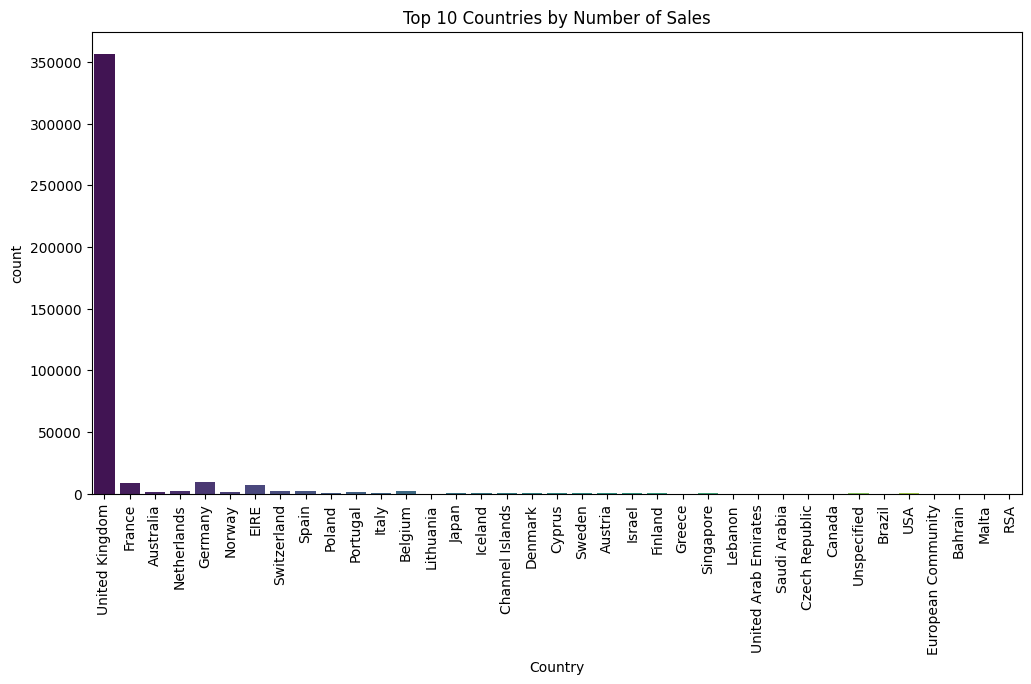

In [437]:
plt.figure(figsize= (12,6))
sns.countplot(
    data=data,
    x="Country",
    palette="viridis"
)
plt.xticks(rotation=90)
plt.title("Top 10 Countries by Number of Sales")

Observation:

The United Kingdom overwhelmingly leads in sales with 356,728 transactions, followed by Germany (9,480) and France (8,475). The UK market is the company's primary revenue driver.

In [438]:
data["CustomerID"].dtype

dtype('float64')

In [439]:
# we need to changr the data type of "CustomerID"
data["CustomerID"] = data["CustomerID"].astype("str")

In [440]:
# Top 10 Customers by Number of Purchases
data["CustomerID"].value_counts().head(10)

,count
CustomerID,
17841.0,7812
14911.0,5898
14096.0,5128
12748.0,4459
14606.0,2759
15311.0,2478
14646.0,2085
13089.0,1853
13263.0,1667


<ipython-input-441-240d6db8bc9a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'Top 10 Customers by Sales')

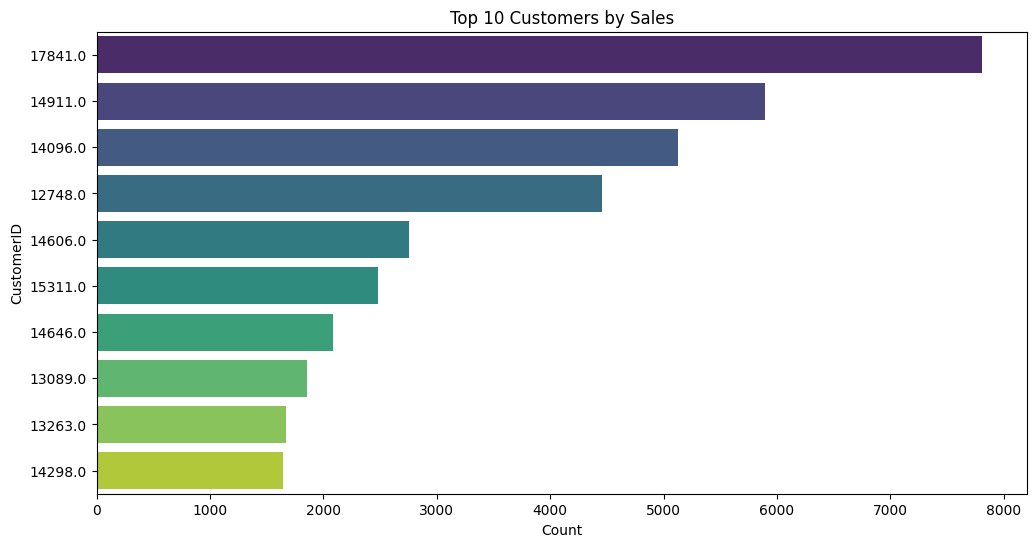

In [441]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=data["CustomerID"].value_counts().head(10).values,
    y=data["CustomerID"].value_counts().head(10).index,
    palette="viridis"
)
plt.xlabel("Count")
plt.title("Top 10 Customers by Sales")


Observation:
Customer ID 17841 made the highest number of purchases, with 7,812 transactions. This indicates a small number of customers contributing significantly to sales.

In [442]:
# Top 10 Countries by Number of Unique Customers
count_cc = data.groupby("Country")["CustomerID"].count().sort_values(ascending = False).head(10)
count_cc

,CustomerID
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


<ipython-input-443-f8243701ba89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 1.0, 'count of customer based on country')

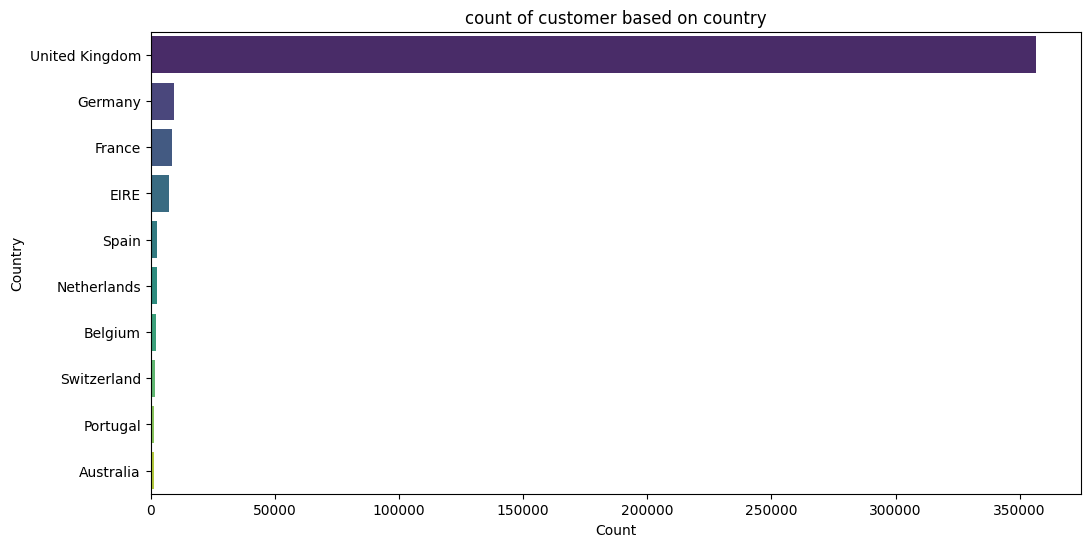

In [443]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=count_cc.values,
    y=count_cc.index,
    palette="viridis"
)
plt.xlabel("Count")
plt.title("count of customer based on country")

Observation:

The distribution of unique customers by country mirrors the sales data, with the UK again leading significantly. This reinforces the UK market's dominance.

In [444]:
# basic EDA Done

# Feature Engineering

In [445]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [446]:
data["InvoiceDate"].head()

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00


In [447]:
# split the "InvoiceDate" columns into "Day","Month","Year"
data["Day"] = data["InvoiceDate"].dt.day
data["Month"] = data["InvoiceDate"].dt.month
data["Year"] = data["InvoiceDate"].dt.year

In [448]:
# let's split time
data['Hour'] = data['InvoiceDate'].dt.hour
data['Minute'] = data['InvoiceDate'].dt.minute
data['Second'] = data['InvoiceDate'].dt.second

In [449]:
data["TotalAmount"] = data["Quantity"] * data["UnitPrice"]

In [450]:
# Update dataFrame after feature Engineering
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,Hour,Minute,Second,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,8,26,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,26,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,8,26,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,26,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,8,26,0,20.34


## Trend Over Time

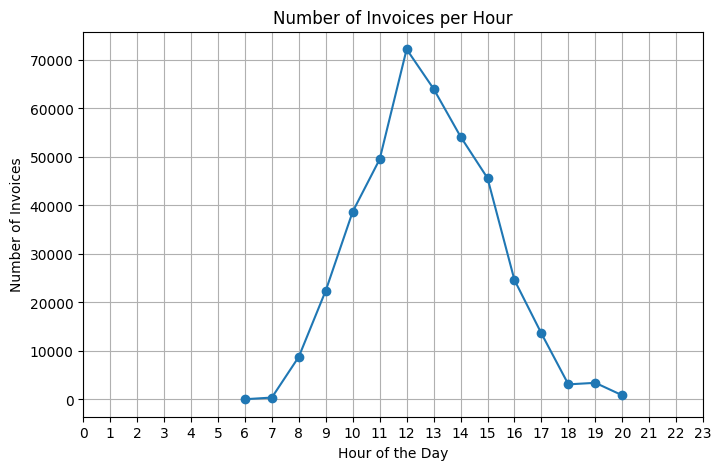

In [451]:
invoice_counts = data['Hour'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.plot(invoice_counts.index, invoice_counts.values, marker='o')
plt.title('Number of Invoices per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Invoices')
plt.xticks(range(0, 24))  # Set x-axis to cover all 24 hours
plt.grid(True)
plt.show()

Observation:

The highest invoice volume occurs between 11 AM and 12 PM, indicating peak business activity during this time.

Daily Invoice Pattern: Invoices increase steadily from morning, peak at midday, and then decrease towards the evening, reflecting a consistent daily processing rhythm.

In [452]:
data['MonthName'] = data["InvoiceDate"].dt.month_name()
Monthly_invoice = data["MonthName"].value_counts().sort_index()

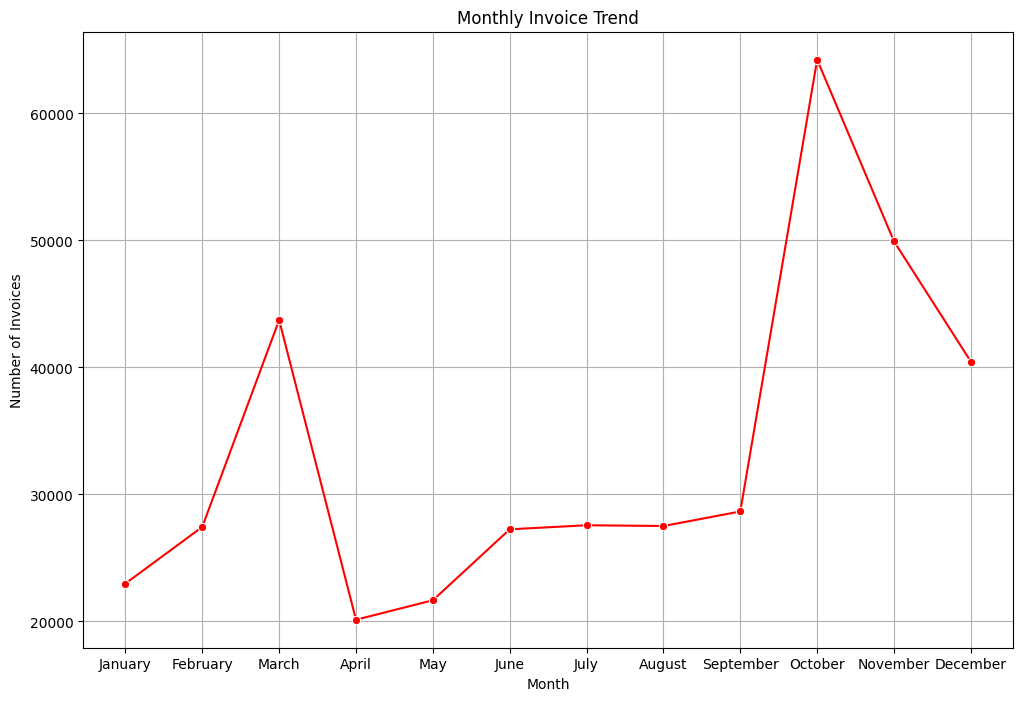

In [453]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12,8))
sns.lineplot(
    x=Monthly_invoice.index,
    y=Monthly_invoice.values,
    marker="o",color="red"
)
plt.xticks(ticks=range(len(month_order)), labels=month_order)
plt.xlabel("Month")
plt.ylabel("Number of Invoices")
plt.title("Monthly Invoice Trend")
plt.grid()
plt.show()

Observation:

Invoices fluctuate throughout the year, with a peak in October.
April and December see the lowest invoice volumes, indicating slower business activity.
Invoice volumes generally rise from January to October, then sharply decline towards the end of the year.


# Model Building

## RFM Analysis

In [454]:
# New Attribute: Frequency - The number of purchases made by each customer.

rfm_f = data.groupby("CustomerID")["InvoiceNo"].count().reset_index().rename(columns = {'InvoiceNo':'Frequency'})
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [455]:
# New Attribute: Recency - The difference between the latest order date in the dataset and the customer's most recent order date.

max_date = max(data["InvoiceDate"])
print(f"Latest order date in the dataset: {max_date}")

rfm_r = data.groupby("CustomerID")["InvoiceDate"].apply(lambda x: (max_date - x.max()).days).reset_index()
rfm_r.rename(columns = {'InvoiceDate':'Recency'},inplace=True)
rfm_r.head()


Latest order date in the dataset: 2011-12-09 12:50:00


,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [456]:
rfm_m = data.groupby("CustomerID")["TotalAmount"].sum().reset_index()
rfm_m.rename(columns={'TotalAmount': 'Monetary'}, inplace=True)

In [457]:
rfm = pd.merge(rfm_m, rfm_r, on='CustomerID')
rfm = pd.merge(rfm, rfm_f, on='CustomerID')

In [458]:
rfm.shape

(4372, 4)

In [459]:
rfm.head()

,CustomerID,Monetary,Recency,Frequency
0,12346.0,0.00,325,2
1,12347.0,4310.00,1,182
2,12348.0,1797.24,74,31
3,12349.0,1757.55,18,73
4,12350.0,334.40,309,17


<Axes: >

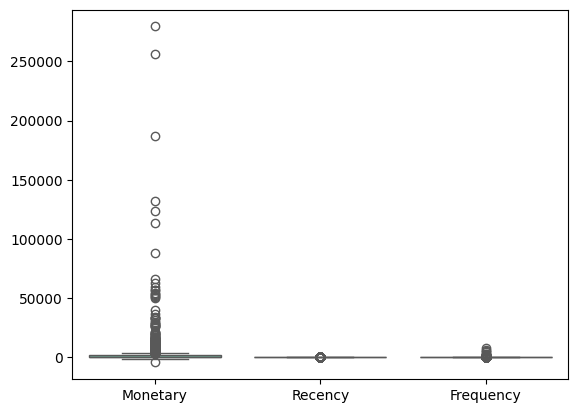

In [460]:
columns = ['Monetary','Recency','Frequency']
sns.boxplot(
    data = rfm[columns],
    palette = "Set2"
)

### Outlier detection and  Removal in RFM

In [461]:
# New attribute : Monetary : total Amount spend by each customer

rfm_m = data.groupby('CustomerID')["TotalAmount"].sum().reset_index().rename(columns = {'TotalAmount':'Monetary'})
rfm_m.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Observation:
There are large amount of Outlier in "Monetary" columns and also there is less number of outlier present in frquency .

<Axes: xlabel='Monetary', ylabel='Count'>

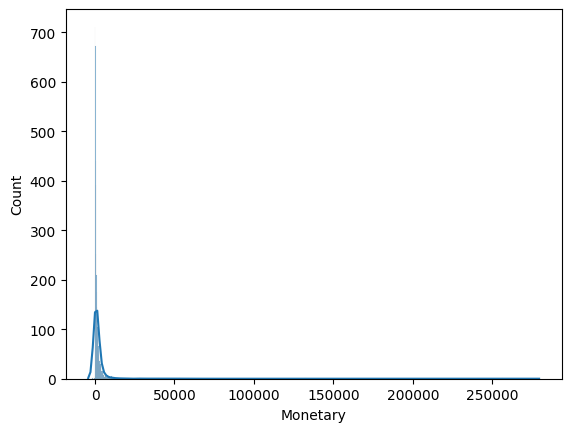

In [462]:
# dtetct Outlier in "Moneatry" columns
sns.histplot(
    data = rfm,
    x="Monetary",
    kde=True
)

In [463]:
# detect the Outlier
Q1 = rfm["Monetary"].quantile(0.25)
Q3 = rfm['Monetary'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
outliers_m = rfm[(rfm['Monetary'] < lower_limit) | (rfm['Monetary'] > upper_limit)]

print("Outlier in Monetary:")
print(f"There are Total {len(outliers_m)} in 'Monteary' columns")
print(f"Index List  outlier in 'Monteary' columns:{outliers_m.index}")
print(outliers_m)

Outlier in Monetary:
There are Total 421 in 'Monteary' columns
Index List  outlier in 'Monteary' columns:Index([   1,   10,   12,   15,   27,   50,   55,   66,   67,   69,
       ...
       4238, 4245, 4260, 4285, 4305, 4324, 4326, 4327, 4330, 4347],
      dtype='int64', length=421)
     CustomerID  Monetary  Recency  Frequency
1       12347.0   4310.00        1        182
10      12357.0   6207.67       32        131
12      12359.0   6182.98        7        251
15      12362.0   5154.58        2        274
27      12378.0   4008.62      129        219
...         ...       ...      ...        ...
4324    18223.0   6315.23        1        299
4326    18225.0   5356.86        2        284
4327    18226.0   5192.10       38        245
4330    18229.0   7276.90       11        164
4347    18251.0   4314.72       86         16

[421 rows x 4 columns]


In [464]:
# remove the Outlier from 'Monteary' columns
rfm = rfm.drop(outliers_m.index)

In [465]:
# let's do another column detect and remove
Q1 = rfm["Recency"].quantile(0.25)
Q3 = rfm['Recency'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
outliers_r = rfm[(rfm['Recency'] < lower_limit) | (rfm['Recency'] > upper_limit)]

print("Outlier in Recency:")
print(f"There are Total {len(outliers_r)} in 'Recency' columns")
print(f"Index List  outlier in 'Recency' columns:{outliers_r.index}")
print(outliers_r)

Outlier in Recency:
There are Total 83 in 'Recency' columns
Index List  outlier in 'Recency' columns:Index([  77,  212,  281,  313,  324,  359,  406,  415,  514,  552,  584,  704,
        780, 1046, 1073, 1087, 1200, 1291, 1334, 1384, 1405, 1488, 1653, 1663,
       1727, 1764, 1824, 1831, 1908, 2007, 2083, 2092, 2123, 2208, 2219, 2222,
       2332, 2502, 2619, 2632, 2648, 2649, 2661, 2748, 2793, 2802, 2892, 2907,
       3080, 3117, 3126, 3129, 3184, 3198, 3227, 3235, 3254, 3256, 3281, 3291,
       3338, 3360, 3385, 3435, 3615, 3650, 3763, 3828, 3898, 3970, 4051, 4056,
       4072, 4096, 4107, 4139, 4140, 4147, 4149, 4170, 4212, 4241, 4246],
      dtype='int64')
     CustomerID  Monetary  Recency  Frequency
77      12441.0    173.55      366         11
212     12605.0     -7.50      364          3
281     12686.0     89.14      371          7
313     12725.0    427.80      370         24
324     12738.0    155.35      371         11
...         ...       ...      ...        ...
4149    

In [466]:
# remove the Outlier from 'Rencey' columns
rfm = rfm.drop(outliers_r.index)

In [467]:
rfm

,CustomerID,Monetary,Recency,Frequency
0,12346.0,0.00,325,2
2,12348.0,1797.24,74,31
3,12349.0,1757.55,18,73
4,12350.0,334.40,309,17
5,12352.0,1545.41,35,95
...,...,...,...,...
4367,18280.0,180.60,277,10
4368,18281.0,80.82,180,7
4369,18282.0,176.60,7,13
4370,18283.0,2045.53,3,721


In [468]:
# detect the Outlier
Q1 = rfm["Frequency"].quantile(0.25)
Q3 = rfm['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
outliers_f = rfm[(rfm['Frequency'] < lower_limit) | (rfm['Frequency'] > upper_limit)]

print("Outlier in Frequency:")
print(f"There are Total {len(outliers_f)} in 'Frequency' columns")
print(f"Index List  outlier in 'Monteary' columns:{outliers_f.index}")
print(outliers_f)

Outlier in Frequency:
There are Total 240 in 'Frequency' columns
Index List  outlier in 'Monteary' columns:Index([  56,  138,  213,  407,  540,  605,  615,  635,  641,  651,
       ...
       4137, 4208, 4214, 4229, 4243, 4249, 4251, 4265, 4309, 4370],
      dtype='int64', length=240)
     CustomerID      Monetary  Recency  Frequency
56      12417.0  3.578800e+03        2        198
138     12517.0  2.443650e+03       27        281
213     12607.0  3.552714e-15       57        202
407     12856.0  2.153530e+03        7        314
540     13047.0  3.079100e+03       31        196
...         ...           ...      ...        ...
4249    18122.0  1.793060e+03        7        357
4251    18125.0  1.130100e+03       29        193
4265    18145.0  2.861550e+03       12        221
4309    18204.0  1.960950e+03       70        194
4370    18283.0  2.045530e+03        3        721

[240 rows x 4 columns]


In [469]:
# remove the Outlier from 'Rencey' columns
rfm = rfm.drop(outliers_f.index)

In [470]:
rfm

,CustomerID,Monetary,Recency,Frequency
0,12346.0,0.00,325,2
2,12348.0,1797.24,74,31
3,12349.0,1757.55,18,73
4,12350.0,334.40,309,17
5,12352.0,1545.41,35,95
...,...,...,...,...
4366,18278.0,173.90,73,9
4367,18280.0,180.60,277,10
4368,18281.0,80.82,180,7
4369,18282.0,176.60,7,13


In [471]:
# shape of rfm dataset after removal outlier
rfm.shape

(3628, 4)

### Standardize the Data

In [472]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
rfm_sc = sc.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [473]:
rfm_sc

array([[ 2.35757649, -1.08096757, -1.05510522],
       [-0.23766569, -0.38713618,  1.3660339 ],
       [-0.81668386,  0.61772307,  1.3125658 ],
       ...,
       [ 0.858333  , -0.96134147, -0.94622913],
       [-0.93041958, -0.81779014, -0.81719978],
       [-0.56853322,  0.54594741,  1.4199735 ]])

## K-means Clustering Algorithm

In [474]:
# import libaries required for KMeans algoaritum
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [475]:
# lets find optimal n_cluster number of cluster for Kmeans aaalgoritum by using "Within Cluster SUm of Squared elbow method"
wcss = []
for i in range(2,11):
  km = KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=42)
  km.fit(rfm_sc)
  wcss.append(km.inertia_)
  print(f"for n_cluster={i} wcss is {km.inertia_}")



for n_cluster=2 wcss is 6109.763108609665
for n_cluster=3 wcss is 3697.6034471730086
for n_cluster=4 wcss is 2910.0448893276384
for n_cluster=5 wcss is 2483.8068502259366
for n_cluster=6 wcss is 2185.6340723963426
for n_cluster=7 wcss is 1938.5026165231907
for n_cluster=8 wcss is 1758.3585812853753
for n_cluster=9 wcss is 1587.9132849890468
for n_cluster=10 wcss is 1475.4517113865631


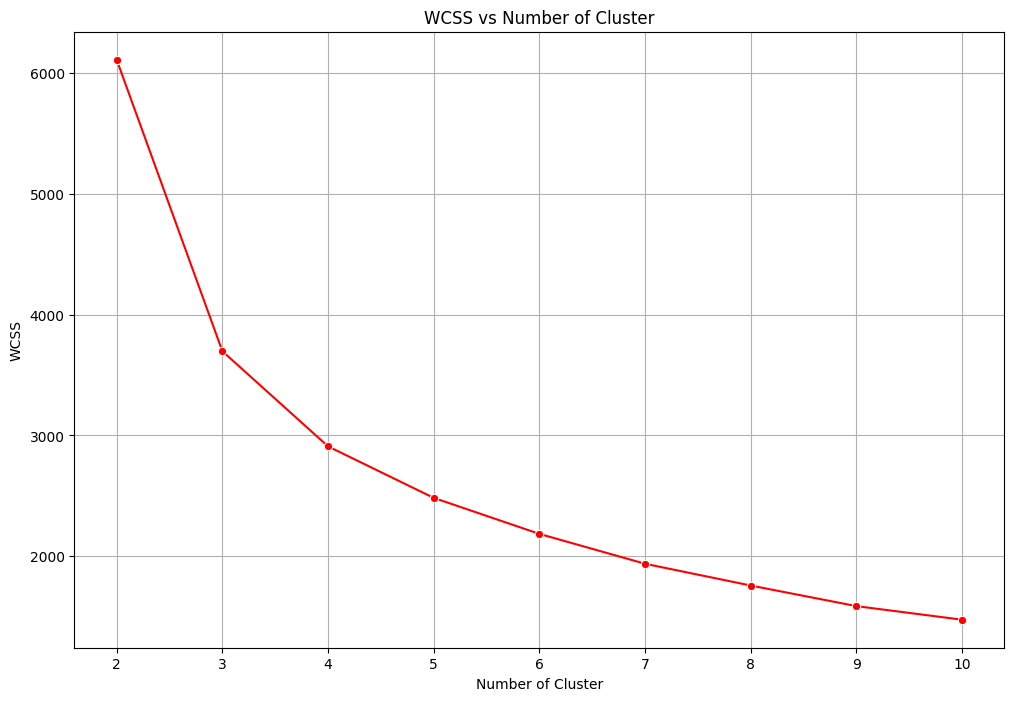

In [476]:
# plot the wcss graph vs n_cluster graph
plt.figure(figsize=(12,8))
sns.lineplot(x=range(2,11),
             y=wcss,
             color="red",
             marker="o")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.title("WCSS vs Number of Cluster")
plt.grid()
plt.show()


In [477]:
for i in range(2,10):
  km = KMeans(n_clusters=i,
              init='k-means++',
              n_init= 10,
              random_state = 42)
  clusters = km.fit_predict(rfm_sc)
  sil_score = silhouette_score(rfm_sc,clusters)
  print(f"for {i} clusters Silhouette Score: {sil_score}")

for 2 clusters Silhouette Score: 0.4264311000042556
for 3 clusters Silhouette Score: 0.4415058950181874
for 4 clusters Silhouette Score: 0.40744091566537743
for 5 clusters Silhouette Score: 0.38995650130224524
for 6 clusters Silhouette Score: 0.3546265988775692
for 7 clusters Silhouette Score: 0.33471222865951616
for 8 clusters Silhouette Score: 0.3425114468049292
for 9 clusters Silhouette Score: 0.35120727823132053


*Observation*  
Considering both WCSS and the Silhouette Score, 3 clusters appear to be the optimal choice for this dataset.

The clusters formed are not only well-separated but also have a significant reduction in WCSS, which balances cluster tightness with minimal overlap between clusters.

In [478]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                n_init = 10,
                random_state = 42)
rfm["Clusters"] = kmeans.fit_predict(rfm_sc)
silhouette_avg = silhouette_score(rfm_sc, rfm["Clusters"])
print(f'Silhouette KMeans Score: {silhouette_avg:.2f}')

Silhouette KMeans Score: 0.44


In [479]:
rfm

,CustomerID,Monetary,Recency,Frequency,Clusters
0,12346.0,0.00,325,2,2
2,12348.0,1797.24,74,31,1
3,12349.0,1757.55,18,73,0
4,12350.0,334.40,309,17,2
5,12352.0,1545.41,35,95,0
...,...,...,...,...,...
4366,18278.0,173.90,73,9,1
4367,18280.0,180.60,277,10,2
4368,18281.0,80.82,180,7,2
4369,18282.0,176.60,7,13,1


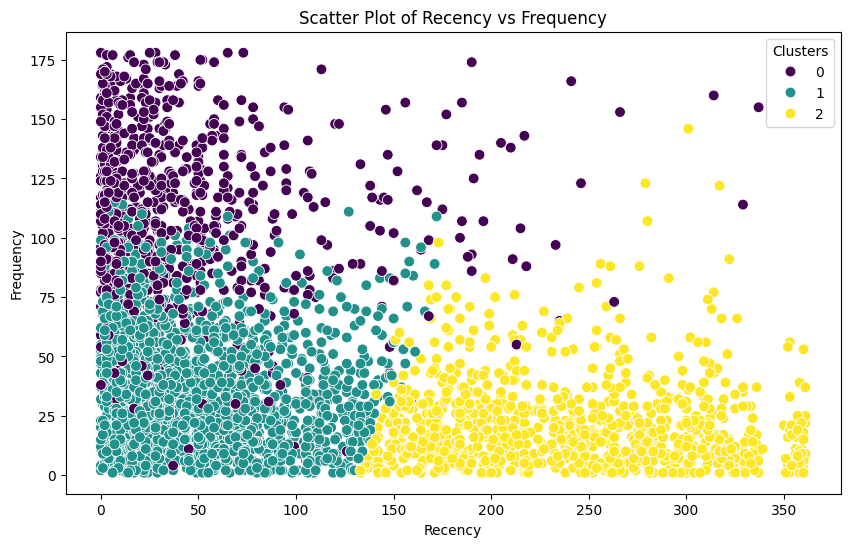

In [480]:
# plot the scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm,
            x="Recency",
            y="Frequency",
            hue= "Clusters",
            s=60,
            palette='viridis')

plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Scatter Plot of Recency vs Frequency")
plt.show()


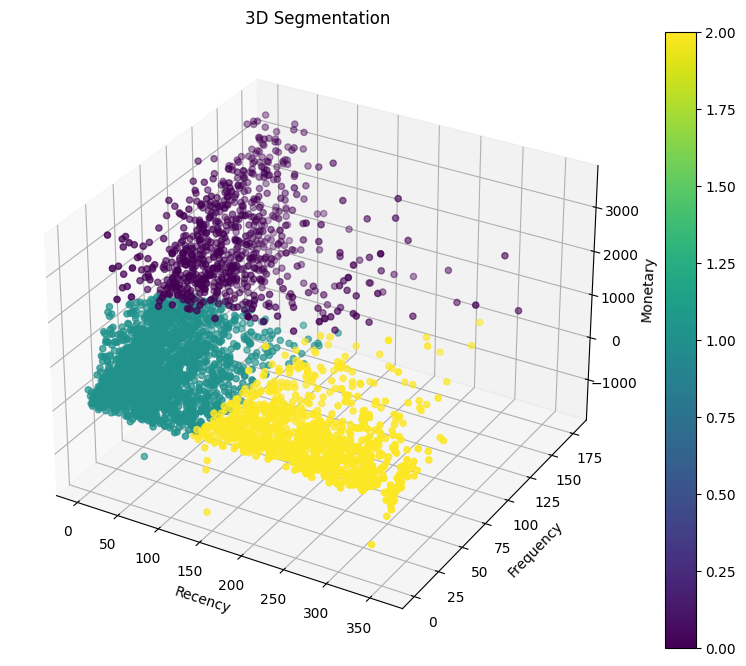

In [481]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Clusters'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Segmentation')
plt.colorbar(scatter)
plt.show()


 Observation:

 K-Means produced a moderate silhouette score, indicating reasonably well-defined clusters with some overlap.

## DBSCAN Algorithm

In [482]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [483]:
dbscan = DBSCAN(eps=0.5,
                min_samples=3)
dbscan.fit(rfm_sc)
labels = dbscan.labels_

In [484]:
score = silhouette_score(rfm_sc,labels)
print(f"Silhouette DBSCAN Score: {score}")

Silhouette DBSCAN Score: 0.16319807630660266


In [485]:
set(lables)

{-1, 0, 1, 2, 3}

<Axes: xlabel='Recency', ylabel='Frequency'>

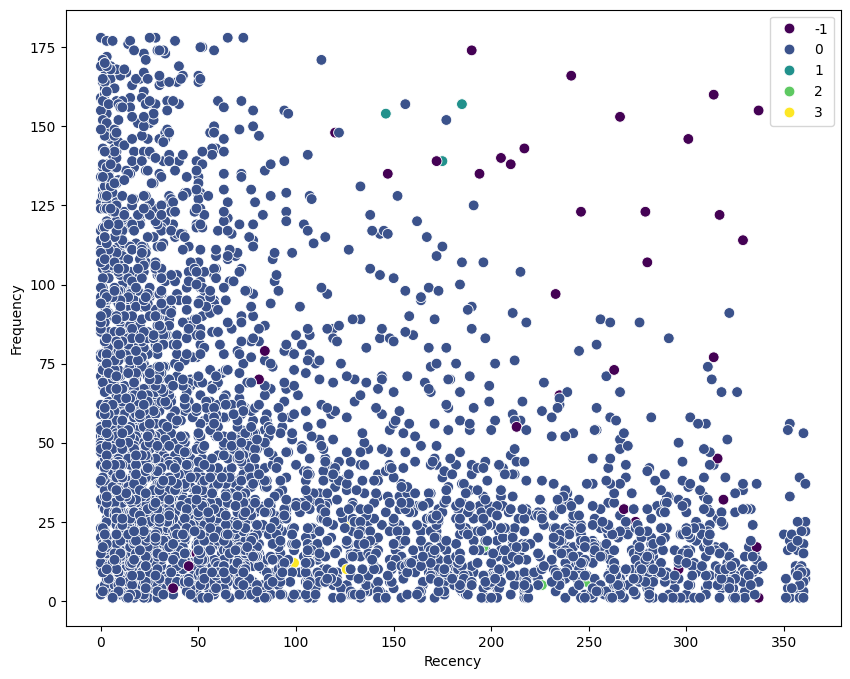

In [486]:
plt.figure(figsize = (10,8))
sns.scatterplot(
    data = rfm,
    x = "Recency",
    y="Frequency",
    hue = labels,
    s=60,
    palette = "viridis"
)

Observation:

DBSCAN yielded a low silhouette score, suggesting poorly defined clusters with potential noise.

## Hierarchical Clustering

In [487]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(rfm_sc)
clusters = model.labels_

In [488]:
clusters

array([2, 1, 0, ..., 2, 1, 0])

<Axes: xlabel='Recency', ylabel='Frequency'>

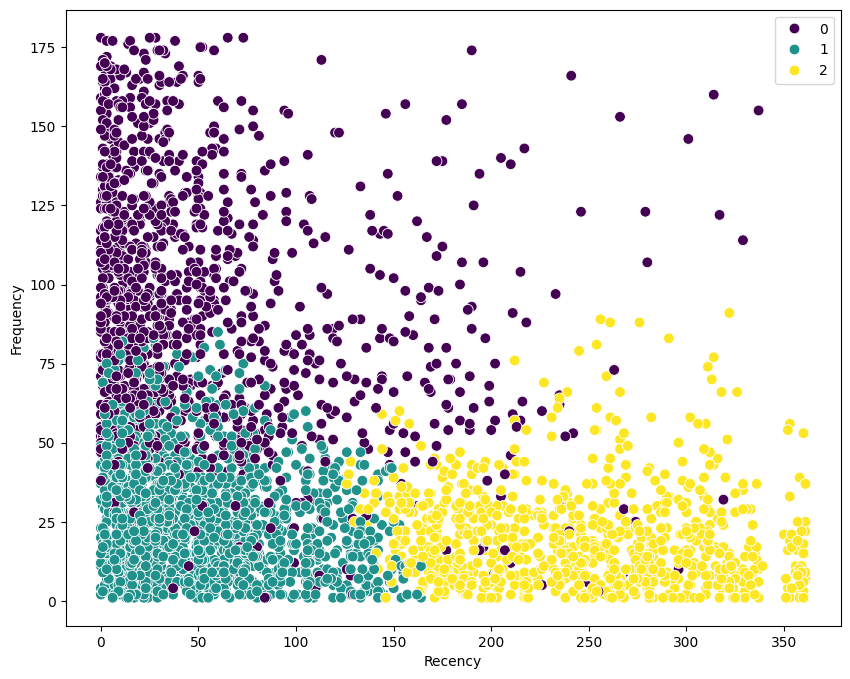

In [489]:
plt.figure(figsize = (10,8))
sns.scatterplot(
    data = rfm,
    x = "Recency",
    y="Frequency",
    hue = clusters,
    s=60,
    palette = "viridis"
)

Observation:

Agglomerative Clustering achieved a silhouette score slightly lower than K-Means, indicating moderately well-defined clusters, but still less distinct than K-Means.

In [490]:
score = silhouette_score(rfm_sc,clusters)
print(f"Silhouette Score for AgglomerativeClustering: {score}")

Silhouette Score for AgglomerativeClustering: 0.38890894030859413


# BEST Algorithm should be K-Means

# Selected Model: K-Means Clustering
K-Means with **n=3** clusters was selected due to its superior silhouette score, indicating the most effective clustering of customer segments.

In [491]:
Cluster_Df = rfm.groupby(["Clusters"]).agg({
    "Monetary": "mean",
    "Recency": "mean",
    "Frequency": "mean"
}).reset_index()

print(Cluster_Df)

   Clusters     Monetary     Recency   Frequency
0         0  1858.359834   42.912596  109.985861
1         1   561.342607   49.316832   34.282960
2         2   342.095424  240.429646   21.283566


1) **Cluster 0** :  Customers in this cluster have high spending, frequent purchases, and recent interactions, indicating they are highly engaged and valuable to the business called as **High-Value Frequent Buyers(Whales)**

2) **Cluster 1** : Customers in this cluster have moderate spending, frequency, and recency, suggesting they are regular but not exceptional in terms of engagement or expenditure called as **Average Customers**

3) **Cluster 2** : Customers in this cluster have low spending, infrequent purchases, and have not interacted recently, indicating they are less engaged and at risk of churning called as **At-Risk Customers** . They are at risk of churning and need re-engagement strategies.

In [492]:
Cluster_Df["Clusters"] = Cluster_Df["Clusters"].map({
    0: "Whales",
    1: "Avg Customers",
    2: "At-Risk Customers",
})

In [493]:
Cluster_Df

,Clusters,Monetary,Recency,Frequency
0,Whales,1858.359834,42.912596,109.985861
1,Avg Customers,561.342607,49.316832,34.282960
2,At-Risk Customers,342.095424,240.429646,21.283566


In [494]:
rfm

,CustomerID,Monetary,Recency,Frequency,Clusters
0,12346.0,0.00,325,2,2
2,12348.0,1797.24,74,31,1
3,12349.0,1757.55,18,73,0
4,12350.0,334.40,309,17,2
5,12352.0,1545.41,35,95,0
...,...,...,...,...,...
4366,18278.0,173.90,73,9,1
4367,18280.0,180.60,277,10,2
4368,18281.0,80.82,180,7,2
4369,18282.0,176.60,7,13,1


In [496]:
rfm["Clusters"] = rfm["Clusters"].map({
    0: "Whales",
    1: "Avg Customers",
    2: "At-Risk Customers",
})

            Clusters  count
0      Avg Customers   1919
1  At-Risk Customers    931
2             Whales    778


Text(0.5, 1.0, 'Distribution of Customer Clusters')

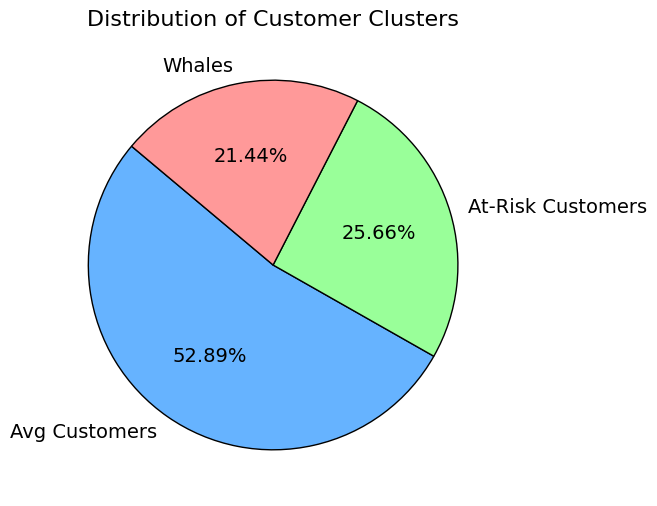

In [504]:
# let's do EDA to know distribution as well as percentage of cutomer time
Counts = pd.DataFrame(rfm["Clusters"].value_counts().reset_index())
print(Counts)

plt.figure(figsize=(10, 6))
colors = ["#66b3ff", "#99ff99", "#ff9999"]
plt.pie(
    x=rfm["Clusters"].value_counts().values,
    labels=rfm["Clusters"].value_counts().index,
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 14}
)

plt.title('Distribution of Customer Clusters', fontsize=16)

Observation:
The RFM analysis and customer segmentation reveal that the majority of customers fall into the "Avg Customers" category, comprising over 50% of the total customer base. The detailed distribution is as follows:

**Avg Customers**: 1919 customers (52.89%)

**At-Risk Customers**: 931 customers (25.66%)

**High-Value Frequent Buyers(Whales)**: 778 customers (21.44%)

This suggests that while the majority of customers are average in terms of recency, frequency, and monetary value, a significant portion of customers are at risk, and a smaller but valuable segment, the "High-Value Frequent Buyers (Whales)," represents high-value customers.

In conclusion, the RFM analysis helped identify different types of customers, giving us a better understanding of their behavior. These insights can now be used to create more effective marketing strategies, improve customer relationships, and focus on valuable customers to boost business growth and profits.